<a href="https://colab.research.google.com/github/sebastianrdz/portafolio-implementacion/blob/main/A00827463_SebastianRdz_Modulo1_Mercurio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Momento de Retroalimentación: Módulo 1 Construcción de un modelo estadístico base (Portafolio Implementación)


## Setup de base de datos.

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")  
!pwd

Mounted at /content/gdrive
/content


In [ ]:
%cd "/content/gdrive/MyDrive/Colab Notebooks"
!ls  # show current directory

/content/gdrive/MyDrive/Colab Notebooks
 A00827463_SebastianRdz_Modulo1_Mercurio.ipynb		   Mod2_Aug10.ipynb
 A00827463_SebastianRdz_Modulo1_Salarios.ipynb		   PlayDataset.csv
 A00827463_SebastianRdz_Modulo2_RegresionLineal.ipynb	   PlayDataset.ipynb
'Copia de A00827463_SebastianRdz_Modulo1_Salarios.ipynb'   Practicas
 ds_salaries.csv					   Retos
 mc-donalds-menu.csv					   wine.data
 mercurio.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

In [ ]:
# X1 = número de indentificación
# X2 = nombre del lago
# X3 = alcalinidad (mg/l de carbonato de calcio)
# X4 = PH
# X5 = calcio (mg/l)
# X6 = clorofila (mg/l)
# X7 = concentración media de mercurio (parte por millón) en el tejido muscualar del grupo de peces estudiados en cada lago
# X8 = número de peces estudiados en el lago
# X9 = mínimo de la concentración de mercurio en cada grupo de peces
# X10 = máximo de la concentración de mercurio en cada grupo de peces
# X11 = estimación (mediante regresión) de la concentración de mercurio en el pez de 3 años (o promedio de mercurio cuando la edad no está disponible)
# X12 = indicador de la edad de los peces (0: jóvenes; 1: maduros)

names = ["No.","Name","Alkalinity","PH", "Calcium", "Clorofil", "Mercury Mean", 
         "Fish Count", "Min Concentration", "Max Concentration", "Mercury Estimate", "Fish Indicator"]
data = pd.read_csv("mercurio.csv", header=0, names=names)
data.head()

,No.,Name,Alkalinity,PH,Calcium,Clorofil,Mercury Mean,Fish Count,Min Concentration,Max Concentration,Mercury Estimate,Fish Indicator
0,1,Alligator,5.9,6.1,3.0,0.7,1.23,5,0.85,1.43,1.53,1
1,2,Annie,3.5,5.1,1.9,3.2,1.33,7,0.92,1.90,1.33,0
2,3,Apopka,116.0,9.1,44.1,128.3,0.04,6,0.04,0.06,0.04,0
3,4,Blue Cypress,39.4,6.9,16.4,3.5,0.44,12,0.13,0.84,0.44,0
4,5,Brick,2.5,4.6,2.9,1.8,1.20,12,0.69,1.50,1.33,1


## Exploracion de datos

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   No.                53 non-null     int64  
 1   Name               53 non-null     object 
 2   Alkalinity         53 non-null     float64
 3   PH                 53 non-null     float64
 4   Calcium            53 non-null     float64
 5   Clorofil           53 non-null     float64
 6   Mercury Mean       53 non-null     float64
 7   Fish Count         53 non-null     int64  
 8   Min Concentration  53 non-null     float64
 9   Max Concentration  53 non-null     float64
 10  Mercury Estimate   53 non-null     float64
 11  Fish Indicator     53 non-null     int64  
dtypes: float64(8), int64(3), object(1)
memory usage: 5.1+ KB


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
No.,53.0,27.000000,15.443445,1.00,14.00,27.00,40.00,53.00
Alkalinity,53.0,37.530189,38.203527,1.20,6.60,19.60,66.50,128.00
PH,53.0,6.590566,1.288449,3.60,5.80,6.80,7.40,9.10
Calcium,53.0,22.201887,24.932574,1.10,3.30,12.60,35.60,90.70
Clorofil,53.0,23.116981,30.816321,0.70,4.60,12.80,24.70,152.40
Mercury Mean,53.0,0.527170,0.341036,0.04,0.27,0.48,0.77,1.33
Fish Count,53.0,13.056604,8.560677,4.00,10.00,12.00,12.00,44.00
Min Concentration,53.0,0.279811,0.226406,0.04,0.09,0.25,0.33,0.92
Max Concentration,53.0,0.874528,0.522047,0.06,0.48,0.84,1.33,2.04
Mercury Estimate,53.0,0.513208,0.338729,0.04,0.25,0.45,0.70,1.53


In [ ]:
data.corr()

,No.,Alkalinity,PH,Calcium,Clorofil,Mercury Mean,Fish Count,Min Concentration,Max Concentration,Mercury Estimate,Fish Indicator
No.,1.000000,0.103811,0.040591,0.105023,-0.081981,-0.277466,0.030110,-0.268786,-0.212125,-0.304022,0.132406
Alkalinity,0.103811,1.000000,0.719166,0.832604,0.477531,-0.593897,0.010291,-0.525357,-0.604796,-0.627958,-0.094939
PH,0.040591,0.719166,1.000000,0.577133,0.608483,-0.575400,-0.018606,-0.541965,-0.551815,-0.612849,0.038000
Calcium,0.105023,0.832604,0.577133,1.000000,0.409914,-0.400680,-0.089379,-0.332476,-0.407917,-0.464409,-0.002111
Clorofil,-0.081981,0.477531,0.608483,0.409914,1.000000,-0.491375,-0.011820,-0.400459,-0.484972,-0.506442,-0.283002
Mercury Mean,-0.277466,-0.593897,-0.575400,-0.400680,-0.491375,1.000000,0.079034,0.927205,0.915864,0.959215,0.108739
Fish Count,0.030110,0.010291,-0.018606,-0.089379,-0.011820,0.079034,1.000000,-0.081653,0.161092,0.025800,0.207956
Min Concentration,-0.268786,-0.525357,-0.541965,-0.332476,-0.400459,0.927205,-0.081653,1.000000,0.765353,0.919089,0.100662
Max Concentration,-0.212125,-0.604796,-0.551815,-0.407917,-0.484972,0.915864,0.161092,0.765353,1.000000,0.859758,0.093752
Mercury Estimate,-0.304022,-0.627958,-0.612849,-0.464409,-0.506442,0.959215,0.025800,0.919089,0.859758,1.000000,0.089411


In [ ]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  


,No.,Alkalinity,PH,Calcium,Clorofil,Mercury Mean,Fish Count,Min Concentration,Max Concentration,Mercury Estimate,Fish Indicator
No.,1.00,0.10,0.04,0.11,-0.08,-0.28,0.03,-0.27,-0.21,-0.30,0.13
Alkalinity,0.10,1.00,0.72,0.83,0.48,-0.59,0.01,-0.53,-0.60,-0.63,-0.09
PH,0.04,0.72,1.00,0.58,0.61,-0.58,-0.02,-0.54,-0.55,-0.61,0.04
Calcium,0.11,0.83,0.58,1.00,0.41,-0.40,-0.09,-0.33,-0.41,-0.46,-0.00
Clorofil,-0.08,0.48,0.61,0.41,1.00,-0.49,-0.01,-0.40,-0.48,-0.51,-0.28
Mercury Mean,-0.28,-0.59,-0.58,-0.40,-0.49,1.00,0.08,0.93,0.92,0.96,0.11
Fish Count,0.03,0.01,-0.02,-0.09,-0.01,0.08,1.00,-0.08,0.16,0.03,0.21
Min Concentration,-0.27,-0.53,-0.54,-0.33,-0.40,0.93,-0.08,1.00,0.77,0.92,0.10
Max Concentration,-0.21,-0.60,-0.55,-0.41,-0.48,0.92,0.16,0.77,1.00,0.86,0.09
Mercury Estimate,-0.30,-0.63,-0.61,-0.46,-0.51,0.96,0.03,0.92,0.86,1.00,0.09


In [ ]:
data.corrwith(data['Mercury Mean'])

No.                 -0.277466
Alkalinity          -0.593897
PH                  -0.575400
Calcium             -0.400680
Clorofil            -0.491375
Mercury Mean         1.000000
Fish Count           0.079034
Min Concentration    0.927205
Max Concentration    0.915864
Mercury Estimate     0.959215
Fish Indicator       0.108739
dtype: float64

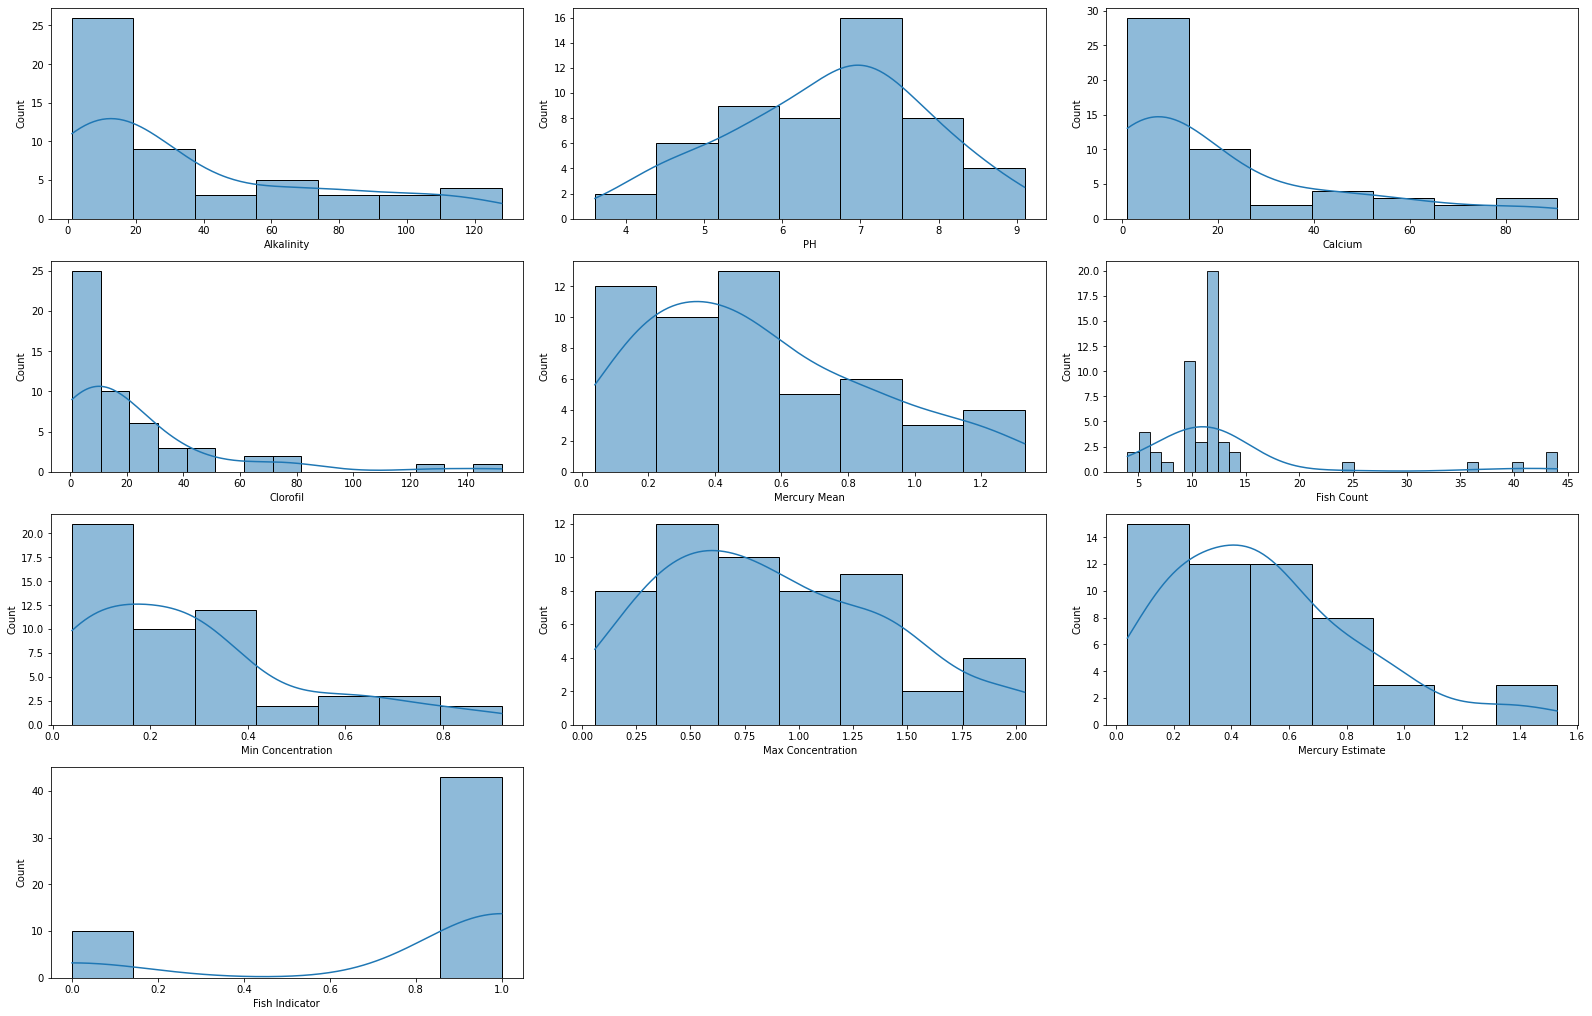

In [ ]:
def format_axes(fig):
    for i, ax in enumerate(fig.axes):
        ax.tick_params(labelbottom=True, labelleft=True)
fig = plt.figure(constrained_layout=True, figsize=(22,14))
gs = GridSpec(4, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[1, 0])
ax5 = fig.add_subplot(gs[1, 1])
ax6 = fig.add_subplot(gs[1, 2])
ax7 = fig.add_subplot(gs[2, 0])
ax8 = fig.add_subplot(gs[2, 1])
ax9 = fig.add_subplot(gs[2, 2])
ax10 = fig.add_subplot(gs[3, 0])
sns.histplot(ax=ax1, data=data, x="Alkalinity", kde=True)
sns.histplot(ax=ax2, data=data, x="PH", kde=True)
sns.histplot(ax=ax3, data=data, x="Calcium", kde=True)
sns.histplot(ax=ax4, data=data, x="Clorofil", kde=True)
sns.histplot(ax=ax5, data=data, x="Mercury Mean", kde=True)
sns.histplot(ax=ax6, data=data, x="Fish Count", kde=True)
sns.histplot(ax=ax7, data=data, x="Min Concentration", kde=True)
sns.histplot(ax=ax8, data=data, x="Max Concentration", kde=True)
sns.histplot(ax=ax9, data=data, x="Mercury Estimate", kde=True)
sns.histplot(ax=ax10, data=data, x="Fish Indicator", kde=True)


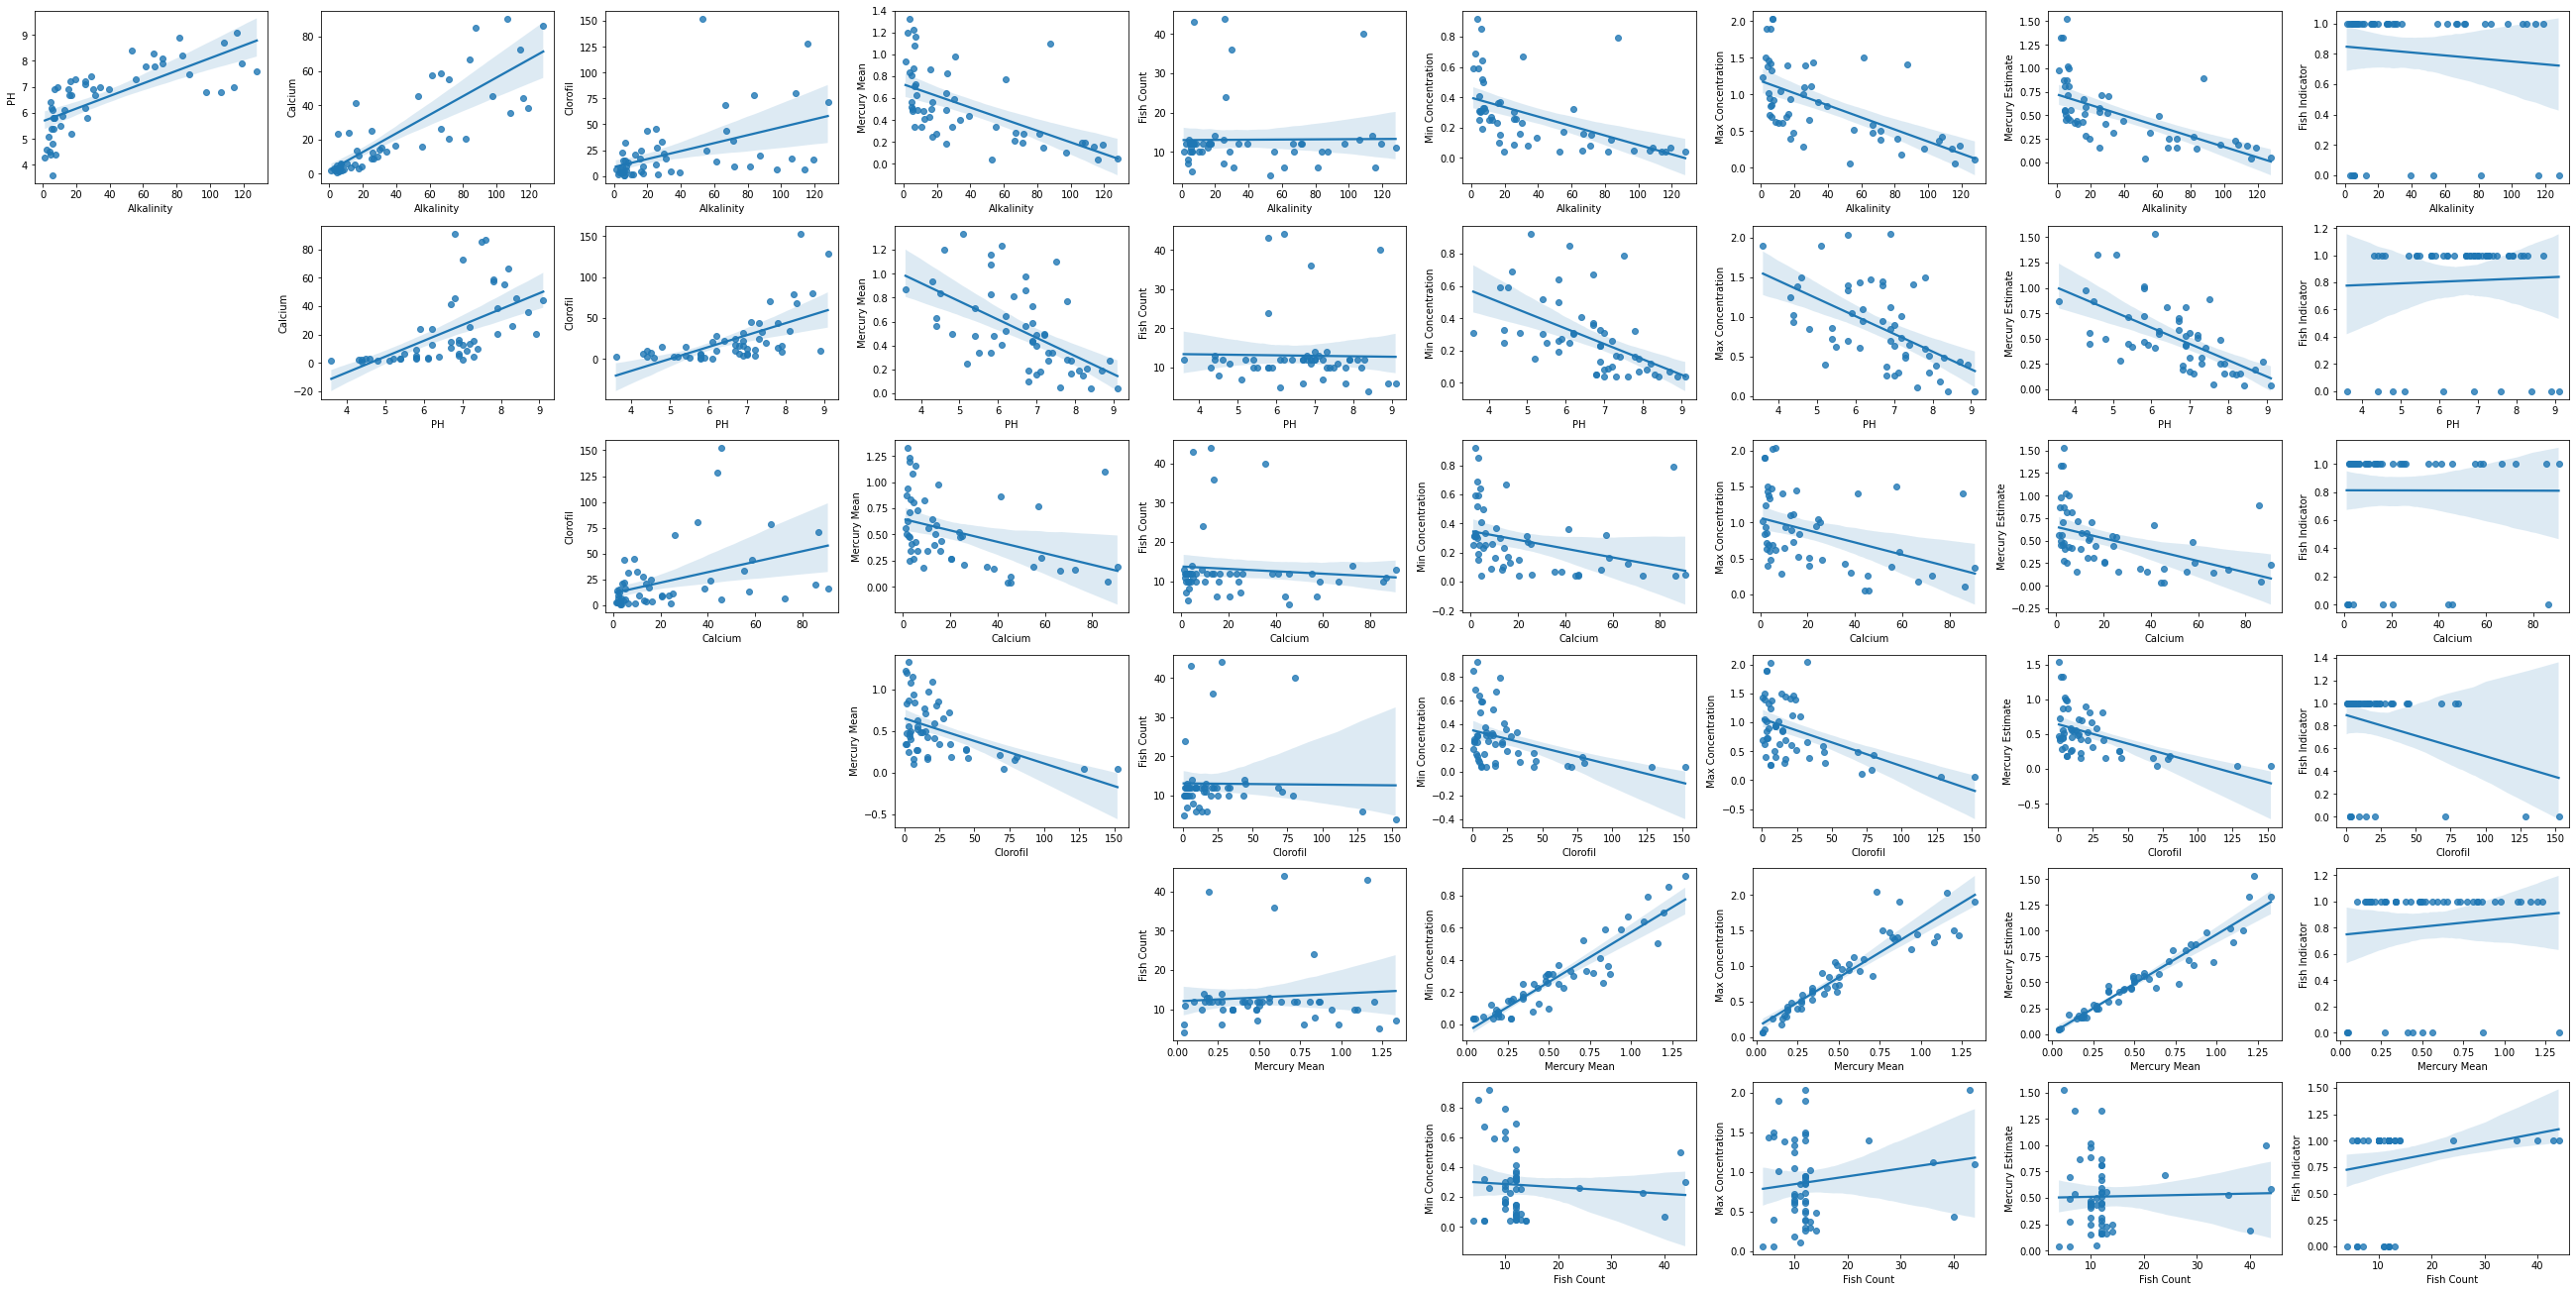

In [ ]:
def format_axes(fig):
    for i, ax in enumerate(fig.axes):
        ax.tick_params(labelbottom=True, labelleft=True)
fig = plt.figure(constrained_layout=True, figsize=(36,18))
gs = GridSpec(6, 9, figure=fig)
ax11 = fig.add_subplot(gs[0, 0])
ax12 = fig.add_subplot(gs[0, 1])
ax13 = fig.add_subplot(gs[0, 2])
ax14 = fig.add_subplot(gs[0, 3])
ax15 = fig.add_subplot(gs[0, 4])
ax16 = fig.add_subplot(gs[0, 5])
ax17 = fig.add_subplot(gs[0, 6])
ax18 = fig.add_subplot(gs[0, 7])
ax19 = fig.add_subplot(gs[0, 8])

ax22 = fig.add_subplot(gs[1, 1])
ax23 = fig.add_subplot(gs[1, 2])
ax24 = fig.add_subplot(gs[1, 3])
ax25 = fig.add_subplot(gs[1, 4])
ax26 = fig.add_subplot(gs[1, 5])
ax27 = fig.add_subplot(gs[1, 6])
ax28 = fig.add_subplot(gs[1, 7])
ax29 = fig.add_subplot(gs[1, 8])

ax33 = fig.add_subplot(gs[2, 2])
ax34 = fig.add_subplot(gs[2, 3])
ax35 = fig.add_subplot(gs[2, 4])
ax36 = fig.add_subplot(gs[2, 5])
ax37 = fig.add_subplot(gs[2, 6])
ax38 = fig.add_subplot(gs[2, 7])
ax39 = fig.add_subplot(gs[2, 8])

ax44 = fig.add_subplot(gs[3, 3])
ax45 = fig.add_subplot(gs[3, 4])
ax46 = fig.add_subplot(gs[3, 5])
ax47 = fig.add_subplot(gs[3, 6])
ax48 = fig.add_subplot(gs[3, 7])
ax49 = fig.add_subplot(gs[3, 8])

ax55 = fig.add_subplot(gs[4, 4])
ax56 = fig.add_subplot(gs[4, 5])
ax57 = fig.add_subplot(gs[4, 6])
ax58 = fig.add_subplot(gs[4, 7])
ax59 = fig.add_subplot(gs[4, 8])

ax66 = fig.add_subplot(gs[5, 5])
ax67 = fig.add_subplot(gs[5, 6])
ax68 = fig.add_subplot(gs[5, 7])
ax69 = fig.add_subplot(gs[5, 8])



sns.regplot(ax=ax11, data=data, x="Alkalinity", y="PH");
sns.regplot(ax=ax12, data=data, x="Alkalinity", y="Calcium");
sns.regplot(ax=ax13, data=data, x="Alkalinity", y="Clorofil");
sns.regplot(ax=ax14, data=data, x="Alkalinity", y="Mercury Mean");
sns.regplot(ax=ax15, data=data, x="Alkalinity", y="Fish Count");
sns.regplot(ax=ax16, data=data, x="Alkalinity", y="Min Concentration");
sns.regplot(ax=ax17, data=data, x="Alkalinity", y="Max Concentration");
sns.regplot(ax=ax18, data=data, x="Alkalinity", y="Mercury Estimate");
sns.regplot(ax=ax19, data=data, x="Alkalinity", y="Fish Indicator");

sns.regplot(ax=ax22, data=data, x="PH", y="Calcium");
sns.regplot(ax=ax23, data=data, x="PH", y="Clorofil");
sns.regplot(ax=ax24, data=data, x="PH", y="Mercury Mean");
sns.regplot(ax=ax25, data=data, x="PH", y="Fish Count");
sns.regplot(ax=ax26, data=data, x="PH", y="Min Concentration");
sns.regplot(ax=ax27, data=data, x="PH", y="Max Concentration");
sns.regplot(ax=ax28, data=data, x="PH", y="Mercury Estimate");
sns.regplot(ax=ax29, data=data, x="PH", y="Fish Indicator");

sns.regplot(ax=ax33, data=data, x="Calcium", y="Clorofil");
sns.regplot(ax=ax34, data=data, x="Calcium", y="Mercury Mean");
sns.regplot(ax=ax35, data=data, x="Calcium", y="Fish Count");
sns.regplot(ax=ax36, data=data, x="Calcium", y="Min Concentration");
sns.regplot(ax=ax37, data=data, x="Calcium", y="Max Concentration");
sns.regplot(ax=ax38, data=data, x="Calcium", y="Mercury Estimate");
sns.regplot(ax=ax39, data=data, x="Calcium", y="Fish Indicator");

sns.regplot(ax=ax44, data=data, x="Clorofil", y="Mercury Mean");
sns.regplot(ax=ax45, data=data, x="Clorofil", y="Fish Count");
sns.regplot(ax=ax46, data=data, x="Clorofil", y="Min Concentration");
sns.regplot(ax=ax47, data=data, x="Clorofil", y="Max Concentration");
sns.regplot(ax=ax48, data=data, x="Clorofil", y="Mercury Estimate");
sns.regplot(ax=ax49, data=data, x="Clorofil", y="Fish Indicator");

sns.regplot(ax=ax55, data=data, x="Mercury Mean", y="Fish Count");
sns.regplot(ax=ax56, data=data, x="Mercury Mean", y="Min Concentration");
sns.regplot(ax=ax57, data=data, x="Mercury Mean", y="Max Concentration");
sns.regplot(ax=ax58, data=data, x="Mercury Mean", y="Mercury Estimate");
sns.regplot(ax=ax59, data=data, x="Mercury Mean", y="Fish Indicator");

sns.regplot(ax=ax66, data=data, x="Fish Count", y="Min Concentration");
sns.regplot(ax=ax67, data=data, x="Fish Count", y="Max Concentration");
sns.regplot(ax=ax68, data=data, x="Fish Count", y="Mercury Estimate");
sns.regplot(ax=ax69, data=data, x="Fish Count", y="Fish Indicator");


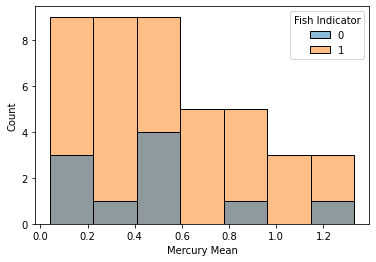

In [ ]:
sns.histplot(data=data, x="Mercury Mean", hue="Fish Indicator");

## Analisis de datos y pregunta base

### Preguntas
**¿Hay evidencia para suponer que la concentración promedio de mercurio en los lagos es dañino para la salud humana? Considera que las normativas de referencia para evaluar los niveles máximos de Hg (Reglamento 34687-MAG y los reglamentos internacionales CE 1881/2006 y Codex Standard 193-1995) establecen que la concentración promedio de mercurio en productos de la pesca no debe superar los 0.5 mg de Hg/kg.**
- _En promedio se presenta una concentracion de 0.4mg de Hg/kg. en los productos de pesca, lo cual puede ser considerado seguro para el consumo de las personas. Sin embargo, se presentan la otra mitad de los datos productos de pesca que van del rango de 0.6mg de Hg/kg hasta los 1.2mg de Hg/kg los que pudieran se considerados excesivamente peligrosos._

**¿Habrá diferencia significativa entre la concentración de mercurio por la edad de los peces?**
- _Sí, la edad tiene gran relación en los niveles de mercurio. En una grafica presentada previamente podemos ver que la mayor cantidad de peces jóvenes tienden a tener niveles de mercurio mas bajos que no superan los 0.4mg. Por otro lado podemos ver que hay pescados adultos que presentan mayores niveles de mercurio superando los 0.5mg como limite._

**Si el muestreo se realizó lanzando una red y analizando los peces que la red encontraba ¿Habrá influencia del número de peces encontrados en la concentración de mercurio en los peces?**
- _Considerando únicamente una zona, no tendría mucha influencia ya que seria una variable más controlada para determinar de manera aleatoria los niveles de mercurio en una prueba._

**¿Las concentraciones de alcalinidad, clorofila, calcio en el agua del lago influyen en la concentración de mercurio de los peces?**
- _No tanto, mejor dicho, estas variables se ven distorsionadas a causa de las diferentes concentraciones a través de los productos de pesca._


### Conclucion
- H0: No hay ninguna relación entre los factores analizados y los niveles de mercurio encontrados en los peces.
- H1: Sí hay una relación entre los factores analizados y los niveles de mercurio encontrados en los peces.
<br>
<br>

Podemos concluir que uno de los factores que mayor impacto tiene en la concentración de los pescados es la edad del pescado tal cual. Una me las más grandes correlaciones que puede identificar fue que en su mayoría, los pescados jóvenes tienen una menor concentración de mercurio en comparación de los pescados adultos. Esto puede indicar que los pescados jóvenes han estado en menor contacto con factores externos (Clorofila, calcio, etc.) en comparación a los adultos. Así mismo puede ser algún otro factor de la anatomía del pescado que trasciende en medida en que envejecen.
<br>
<br>

Ahora bien, analizando las relaciones de los datos, nuestra hipótesis nula (H0) es rechazada y nuestra hipótesis alternativa aceptada. Esto dado a que debido a las correlaciones analizadas en la parte superior, podemos ver que hay cuatro factores que afectan los niveles de mercurio en un rango moderado. Estos son la alcalinidad, PH, calcio y clorofila. Estos cuatro factores tienen una correlación moderada entre 0.4 y 0.6 al compararla con el promedio de mercurio encontrado en los peces. Esto indica que estas variables, mientras que no en su totalidad, afectan los niveles de mercurio. Importante notar que son dependencias negativas, indicando que a medida en que estos factores diminuyen, los niveles de mercurio incrementan.
